In [11]:
from astropy.io import fits
from astropy.coordinates import SkyCoord

import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gp

In [2]:
hdu = fits.open('dr2_tile_info.fits')

In [20]:
tiles = hdu[1].data

In [21]:
tile_shapes = []

In [22]:
for i,tile in enumerate(tiles):
    tshape = Polygon([(tile['RAC1'],tile['DECC1']),
                      (tile['RAC2'],tile['DECC2']),
                      (tile['RAC3'],tile['DECC3']),
                      (tile['RAC4'],tile['DECC4'])])
    tile_shapes.append(tshape)

In [23]:
survey = gp.GeoSeries(tile_shapes)

<AxesSubplot:>

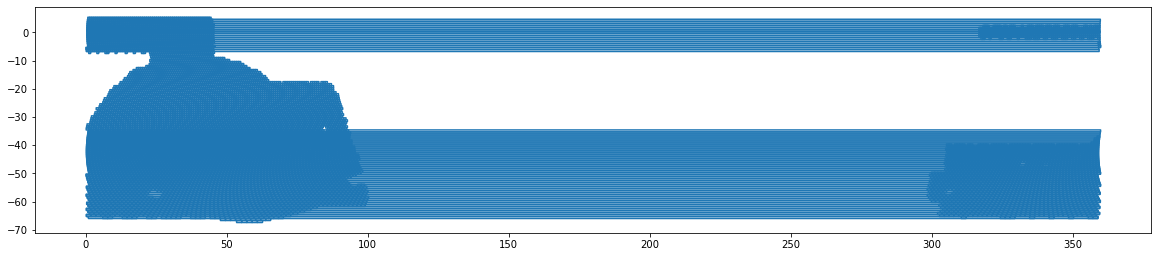

In [36]:
survey.boundary.plot(figsize=(20,10))

In [50]:
footprint = survey.unary_union.boundary

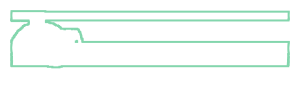

In [51]:
footprint

In [49]:
gp.GeoSeries([footprint]).to_file('des_dr2_footprint.geojson', driver='GeoJSON')